                                                           EXPLORATORY DATA ANALYSIS

Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Loading and Examining Dataset

In [3]:
Digital_footprint = pd.read_csv("C:\\Users\\MBG Traders\\Desktop\\Forensic Analysis of Digital Footprint\\reddit_psychometric_data.csv")
Digital_footprint.head()

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
0,INTP,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,INFJ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,INFP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENTP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking how many Rows and Columns it has 

In [4]:
Digital_footprint.shape

(3586, 27091)

Checking whether it has any null values or not

In [5]:
print("The Sum Value of Missing Values is",Digital_footprint.isnull().any().sum())

The Sum Value of Missing Values is 0


As Dataset has no missing values further we go to check duplicated values

In [6]:
print("The Sum Value of Duplicated Values is", Digital_footprint.duplicated().sum())

The Sum Value of Duplicated Values is 6


As we have 6 duplicated values in our dataset we clean it by removing duplicated values

In [7]:
print("This is the Data after Removing Duplicated Values", Digital_footprint.drop_duplicates(inplace=True))



#This is the Data after Removing Duplicated Values

This is the Data after Removing Duplicated Values None


Rechechking the dataset to make sure duplicated values are removed

In [8]:
Digital_footprint.shape

(3580, 27091)

Checking Summary of Statistics

In [9]:
Digital_footprint.describe()

,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,post_movies,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,...,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,0.002235,0.171229,0.023743,0.000559,0.015084,0.004190,0.000559,0.028212,0.002793,0.027095,...,0.000279,0.000279,0.001676,0.000279,0.000279,0.000279,0.000838,0.000279,0.000838,0.000559
std,0.066825,1.189978,0.305021,0.023633,0.200018,0.076485,0.023633,0.282759,0.052785,0.708857,...,0.016713,0.016713,0.100279,0.016713,0.016713,0.016713,0.050139,0.016713,0.050139,0.033426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,31.000000,13.000000,1.000000,7.000000,2.000000,1.000000,7.000000,1.000000,40.000000,...,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000


Checking its Data Type, it has unformatted or not

In [10]:
Digital_footprint.dtypes

mbti_type                    object
post_AskRedditAfterDark       int64
post_unpopularopinion         int64
post_introvert                int64
post_UnpopularFacts           int64
                              ...  
comment_Actage                int64
comment_sariyerbelediyesi     int64
comment_Ben10                 int64
comment_MKMemes               int64
comment_PIED                  int64
Length: 27091, dtype: object

        THE PERSONALITY TYPES

These numbers show the frequency of each MBTI personality type within your dataset

In [11]:
Digital_footprint['mbti_type'].value_counts()

mbti_type
INTP    790
INFP    594
INTJ    493
ENTP    408
INFJ    367
ENFP    320
ENTJ    148
ISTP    147
ISFP     77
ENFJ     53
ISTJ     46
ESTP     44
ISFJ     32
ESFP     29
ESTJ     19
ESFJ     13
Name: count, dtype: int64

 Creating a bar chart to visualize the distribution of MBTI (Myers-Briggs Type Indicator) personality types among a dataset of people who have received tips based on their personality types

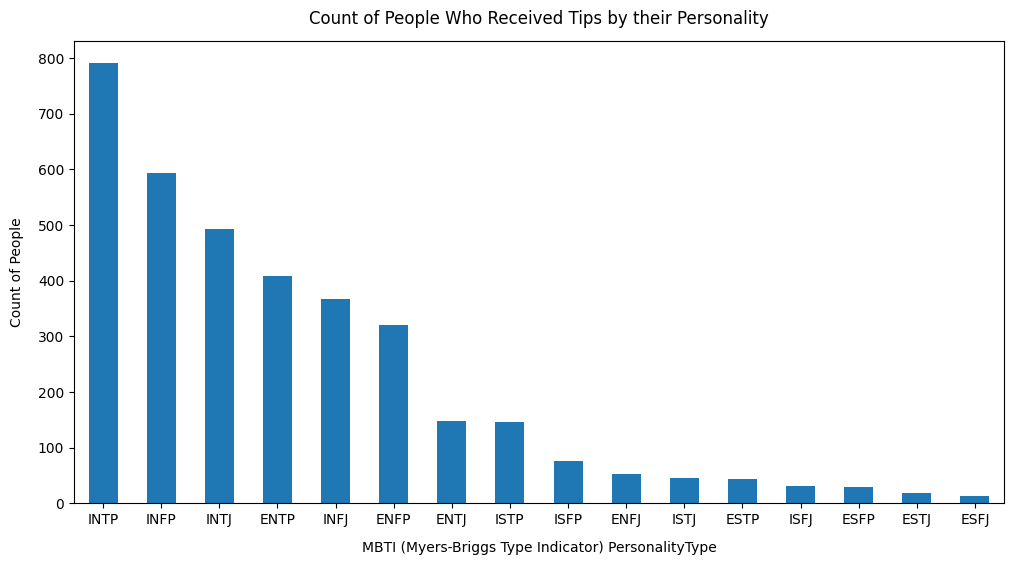

In [12]:
Digital_footprint['mbti_type'].value_counts().plot(kind='bar', figsize=(12, 6), rot=0)
plt.xlabel("MBTI (Myers-Briggs Type Indicator) PersonalityType", labelpad=10)
plt.ylabel("Count of People", labelpad=10)
plt.title("Count of People Who Received Tips by their Personality", y=1.02);


INTP, which stands for Introverted, Intuitive, Thinking, and Perceiving, is the most common personality type among the surveyed individuals. People with an INTP personality are often characterized as quiet and analytical. They prefer solitude and enjoy contemplating how things function while devising solutions to problems. INTPs have a rich inner world and prioritize their internal thoughts over external matters. They typically maintain a small social circle but form close connections with a select group of individuals.

Common career paths associated with INTPs include roles in chemistry, physics, computer programming, forensic science, engineering, mathematics, pharmacy, software development, and geology.

        TO MAKE DATA UNDERSTANDABLE

Naming INTPS as Introversion and types of ENTPS as Extraversion for better Understanding

In [13]:
lIntro = ['INTP','INFP','INTJ','INFJ','ISTP','ISFP','ISTJ','ISFJ']
for i in lIntro:
    Digital_footprint.mbti_type = Digital_footprint.mbti_type.replace(i, "Introversion")
lExtra = ['ENTP','ENFP','ENTJ','ENFJ','ESTP','ESFP','ESTJ','ESFJ']
for i in lExtra:
    Digital_footprint.mbti_type = Digital_footprint.mbti_type.replace(i, "Extraversion")

In [14]:
Digital_footprint.head()

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
0,Introversion,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,Extraversion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Introversion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Introversion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Extraversion,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Converting Categorical Data into Binary, 1 represents  Extraversion and 0 represents Introversion 

In [15]:
Digital_footprint.mbti_type = Digital_footprint.mbti_type.replace({'Extraversion':1,'Introversion':0})

Digital_footprint.head()

,mbti_type,post_AskRedditAfterDark,post_unpopularopinion,post_introvert,post_UnpopularFacts,post_changemyview,post_nihilism,post_IntellectualDarkWeb,post_todayilearned,post_banned,...,comment_actual_detrans,comment_dearbrother,comment_battlefield_4,comment_fixingmovies,comment_AFD,comment_Actage,comment_sariyerbelediyesi,comment_Ben10,comment_MKMemes,comment_PIED
0,0,3,31,3,1,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


        
    PREPROCESSING THE DATA

The first preprocessing step is to divide the dataset into a features set and corresponding personality type.

In [16]:
X = Digital_footprint.iloc[:,1:].values
y = Digital_footprint.iloc[:,0].values


Standard Scaler 

StandardScaler transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

Standard Scaler is useful for classification.
it's transform the data between [-1,1]

In [17]:
X = StandardScaler().fit_transform(X) 

Principal Component Analysis

PCA’s goal is to reduce the curse of dimensionality. It will reduce the features in such a way that it retains most principal information of the features in its principal components.

In [18]:
pca = PCA()
X = pca.fit_transform(X)

            SPLITING THE DATA INTO TRAIN AND TEST SETS

The next preprocessing step is to divide data into training and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


        CLASSIFICATION MODEL ALGORITHM

                    Logistic Regression


Logistic Regression is used when the dependent variable(target) is categorical

Like in our case  Extraversion:1, Introversion:0

In [20]:
lrg = LogisticRegression()
lrg.fit(X_train, y_train)
y_pred = lrg.predict(X_test)
print('Logistic Regression Accuracy' , accuracy_score(y_test, y_pred))

Logistic Regression Accuracy 0.7737430167597765


                Linear Discriminant Analysis

Linear discriminant analysis is used as a tool for classification, dimension reduction, and data visualization. It has been around for quite some time now. Despite its simplicity, LDA often produces robust, decent, and interpretable classification results.

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('LinearDiscriminantAnalysis Accuracy' , accuracy_score(y_test, y_pred))

LinearDiscriminantAnalysis Accuracy 0.7332402234636871


        Gaussian Naive Bayes

Naive Bayes is a classification algorithm for binary and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

In [22]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gaussian Naîve Bayes Accuracy' , accuracy_score(y_test, y_pred))

Gaussian Naîve Bayes Accuracy 0.5293296089385475


                 Random Forest Classifier

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc.predict(X_test)
print('Random Forest Classifier Accuracy' , accuracy_score(y_test, y_pred))

Random Forest Classifier Accuracy 0.7346368715083799


            Support Vector Classifier

Support vector machines Classifier (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

I will use it because of its advantages:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy Suport Vector Classifier' , accuracy_score(y_test, y_pred))

Accuracy Suport Vector Classifier 0.7346368715083799


        Decision Tree

Decision Trees Classifiers are a type of Supervised Machine Learning meaning we build a model, we feed training data matched with correct outputs and then we let the model learn from these patterns. Then we give our model new data that it hasn't seen before so that we can see how it performs. And because we need to see what exactly is to be trained for a Decision Tree, let's see what exactly a decision tree is.

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Accuracy Decision Tree Classifier' , accuracy_score(y_test, y_pred))

Accuracy Decision Tree Classifier 0.6340782122905028


        KNeighbor Classifier

K-Nearest Neighbor is a supervised learning algorithm that can be used for regression as well as classification problems. But KNN is widely used for classification problems in machine learning. KNN works on a principle assuming that every data point falling near to each other will fall in the same class. That means similar things are near to each other.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print('Accuracy KNeighbors Classifier' , accuracy_score(y_test, y_pred))

Accuracy KNeighbors Classifier 0.7807262569832403


we can see that the accuracy of our classification algorithms does not exceed the accuracy of 70%. And if we try to create a deeper model then what will be our precision 

            Neural Network With Keras

Before we begin on building our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference.

In [27]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Before we begin on building our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference.

In [28]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                35810     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 35821 (139.93 KB)
Trainable params: 35821 (139.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Visualization of Accuracy test 

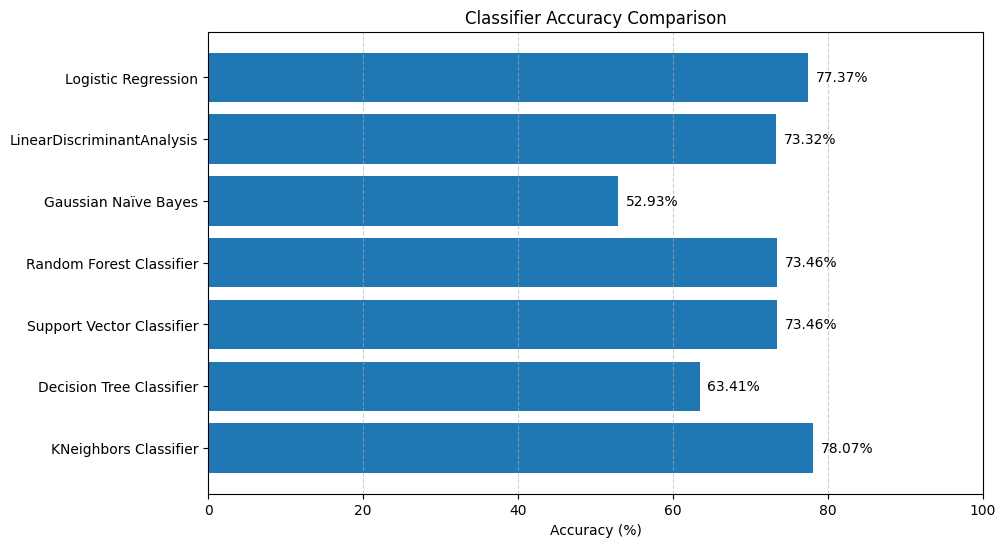

In [29]:
classifiers = ["Logistic Regression", "LinearDiscriminantAnalysis", "Gaussian Naïve Bayes", "Random Forest Classifier", "Support Vector Classifier", "Decision Tree Classifier", "KNeighbors Classifier"]
accuracy_scores = [accuracy_score(y_test, lrg.predict(X_test)), 
                   accuracy_score(y_test, lda.predict(X_test)), 
                   accuracy_score(y_test, gb.predict(X_test)), 
                   accuracy_score(y_test, rfc.predict(X_test)), 
                   accuracy_score(y_test, svc.predict(X_test)), 
                   accuracy_score(y_test, dtc.predict(X_test)), 
                   accuracy_score(y_test, knc.predict(X_test))]

accuracy_percentages = [score * 100 for score in accuracy_scores]


plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracy_percentages)
plt.xlabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0.0, 100.0)  
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)  

for i, percentage in enumerate(accuracy_percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center')

plt.show()


In neural network training, we use the .fit() function with 100 epochs to monitor changes in training loss and accuracy over time. The batch size, which determines how many samples are processed in each step, should be kept small due to our small training set.

In [31]:
history = model.fit(X_train, y_train,
                     epochs= 30,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Now it's time for evaluation .evaluate() method measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy then for the testing data. The longer you would train a neural network, the more likely it is that it starts overfitting.

In [32]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9399
Testing Accuracy:  0.6355


        Access Model Training History in Keras

Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset.

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


 Using this little helper function to visualize the loss and the accuracy for the training and testing data both based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method. In this case, we are only interested in the accuracy. We will try to complete the task by using the matplotlib plotting library:

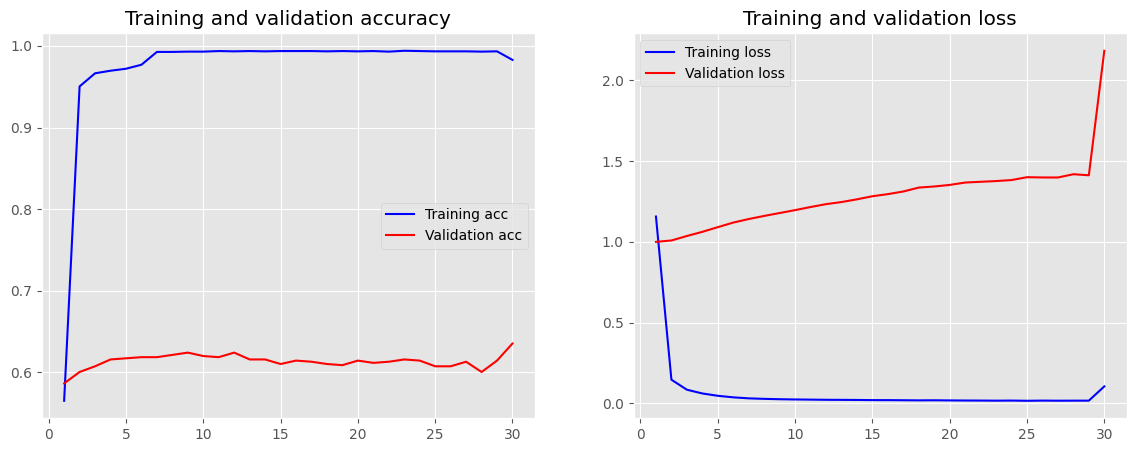

In [38]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

Let's analys the accuracy model : As you can see in the diagram, the accuracy increases unbelievably in the first epoch, indicating that the network is learning fast. Afterwards, the curve flattens indicating that not too many epochs are required to train the model further. Generally, if the training data accuracy (“accuracy”) keeps improving and the validation data accuracy (“val_acc”) gets decreasing which is a good thing.

A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the mode

In [39]:
print(X_train.shape)
print(y_train.shape)
print(y_pred.shape)

(2864, 3580)
(2864,)
(716,)


In [40]:
Result_file = pd.DataFrame({'mbti': y_test[:], 'predicted_value': y_pred})
Result_file.tail()


,mbti,predicted_value
711,1,1
712,0,0
713,0,0
714,0,0
715,0,1


In [41]:
Result_file.predicted_value.value_counts()

predicted_value
0    671
1     45
Name: count, dtype: int64